<a href="https://colab.research.google.com/github/arshnoor23/Assignment_2_MAE598/blob/main/do_assign_2_problem_2_grad_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Homework-2: Problem-2 Gradient Descent**

**Arshnoor Singh Sachdeva**

1222482300


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Parametrs for the Gradient Descent (Inexact line search algorithm)
def f_calculator(alpha,x2,x3):
  t = 0.6
  obj = objective(x2,x3)
  grad = gradient(x2,x3)
  # print(grad)
  f_alpha_grad= 5*((x2-alpha*grad[0][0])**2) + 10*((x3 - alpha*grad[1][0])**2) + 12*(x2-alpha*grad[0][0])*(x3 - alpha*grad[1][0]) - 14*(x3 - alpha*grad[1][0]) - 8*(x2-alpha*grad[0][0]) + 5
  phi = obj - t*(np.linalg.norm(grad)**2)*alpha
  # phi = obj - t*np.matmul(np.transpose(grad),grad)*alpha
  return (f_alpha_grad-phi)     

def gradient(x2,x3):
  return ([10*x2 + 12*x3 - 8],
          [12*x2 + 20*x3 - 14])       

def objective(x2,x3):
  return 5*(x2**2) + 10*(x3**2) + 12*x2*x3 - 14*x3 - 8*x2 + 5     

def inexact_line_search(alpha,x2,x3):
  count = 0
  while count<1000:
    s = f_calculator(alpha,x2,x3)
    # print(s)
    if s>0:
      alpha = alpha*0.5
      count = count+1 
    else:
      # print("Not converging")
      break
  return alpha

Initial guess is 
 x1:1 , x2:0 , x3:0
Nearest point to the plane is 
 x1:-1.0714349441381517,x2:-0.14282419538754487,x3:0.7856944449710805
Minimum Distance:  0.267261244755714


Text(0, 0.5, 'log(error)')

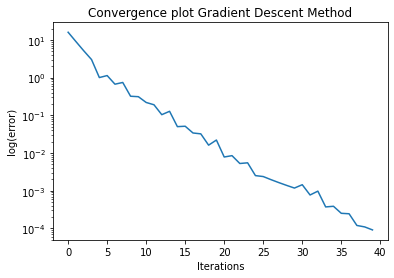

In [5]:
x2 = 0
x3 = 0

tol = 0.0001
grad = gradient(x2,x3)
grad_norm = np.linalg.norm(grad)

count = 0
c = [count]
error = [grad_norm]
while grad_norm>tol and count<100:
  alpha = 1
  alpha = inexact_line_search(alpha,x2,x3)
  # print(x2,x3)
  x2 = x2 - alpha*grad[0][0]
  x3 = x3 - alpha*grad[1][0]
  grad = gradient(x2,x3)
  grad_norm = np.linalg.norm(grad)
  error.append(grad_norm)
  count = count + 1
  c.append(count)

print("=====================================")
print(f'Initial guess is \n x1:1 , x2:0 , x3:0')
print("=====================================")
x1 = 1-2*x2-3*x3
print(f'Nearest point to the plane is \n x1:{x1},x2:{x2},x3:{x3}')
d = (x1+1)**2 + x2**2 + (x3-1)**2
print("=====================================")
print("Minimum Distance: ",np.sqrt(d)) 
print("=====================================")
plt.plot(c,error)
plt.yscale("log")
plt.title("Convergence plot Gradient Descent Method")
plt.xlabel("Iterations")
plt.ylabel("log(error)")
